In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

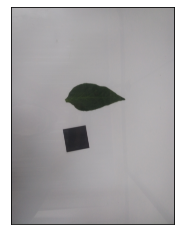

In [2]:
image = cv.imread('./images/bell_pepper_1_pat_4cm_dist_30cm.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
original_image_shape = image.shape

# image = cv.GaussianBlur(image, (7, 7), 0)
%matplotlib inline

plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
image = np.float32(image)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(image)

In [ ]:
# labels = list(kmeans.labels_)
# centroid = kmeans.cluster_centers_

# percent=[]
# for i in range(len(centroid)):
#     j = labels.count(i)
#     j = j / (len(labels))
#     percent.append(j)
    
# plt.pie(percent, colors=np.array(centroid / 255), labels=np.arange(len(centroid)))
# plt.show()

In [ ]:
# labels_reshaped = kmeans.labels_.flatten()
# image_labeled = labels_reshaped.reshape((image_shape[0], image_shape[1], 1))
# image_labeled[:, :] = image_labeled[:, :] * 255

In [ ]:
centers = np.uint8(kmeans.cluster_centers_)

segmented_data = centers[kmeans.labels_.flatten()]
segmented_image = segmented_data.reshape(original_image_shape)

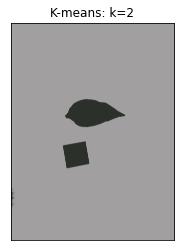

In [ ]:
plt.imshow(segmented_image)
plt.xticks([]), plt.yticks([])
plt.title("K-means: k=2")
plt.show()

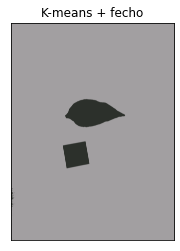

In [ ]:
structuring_element = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

dilate = cv.dilate(segmented_image, structuring_element)
close = cv.erode(dilate, structuring_element)

plt.imshow(close)
plt.xticks([]), plt.yticks([])
plt.title("K-means + fecho")
plt.show()

In [ ]:
# plt.scatter(image[:, 0], image[:, 1], s = 100, c = kmeans.labels_)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
# plt.title('Iris Clusters and Centroids')
# plt.xlabel('SepalLength')
# plt.ylabel('SepalWidth')
# plt.legend()

# plt.show()

# Método Elbow
Método para determinar um valor ideal para a quantidade de clusters baseado no kmeans.inertia_ (It is the sum of squared distances of samples to their closest cluster center.)

In [ ]:
# wcss = []
 
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'random')
#     kmeans.fit(image)
#     print(i, kmeans.inertia_)
#     wcss.append(kmeans.inertia_)

# plt.plot(range(1, 11), wcss)
# plt.title('O Metodo Elbow')
# plt.xlabel('Numero de Clusters')
# plt.ylabel('WSS') #within cluster sum of squares
# plt.show()